### Estrazione testo da PDF (immagini)

#### Innanzi tutto sono necessari i seguenti tools:

- pdf2image : modulo python che consente l'estrazione di immagini da pdf. In pratica converte ogni pagina di un pdf in una immagine PIL. Necessità l'installazione di poppler (Poppler is a PDF rendering library. Include the pdftoppm utility).<br>  vedi note di installazione su https://pypi.org/project/pdf2image/
- pytesseract : python wrapper per Google Tesseract OCR Engine
- PIL : image processing library. E' più semplice e leggera di OpenCV (che ha molte più funzionalità ed è più veloce veloce). Entrambe le librerie supportano:
    - conversione tra diversi formati immagine
    - trasformazione di immagini
    - filtering
    
Vedi tutorial :
- https://nanonets.com/blog/ocr-with-tesseract/
- https://ai-facets.org/tesseract-ocr-best-practices/

    

In [29]:
from pdf2image import convert_from_path 
import pytesseract
from PIL import Image 
import cv2

PDF_file = "riepilogo_F24.pdf"

In [31]:
pages = convert_from_path(pdf_path=PDF_file, dpi=300) 
    
image_counter = 1
  
# Iterate through all the pages stored above 
for page in pages: 
  
    # Declaring filename for each page of PDF as JPG 
    # For each page, filename will be: 
    # PDF page 1 -> page_1.jpg 
    # PDF page 2 -> page_2.jpg 
    # PDF page 3 -> page_3.jpg 
    # .... 
    # PDF page n -> page_n.jpg 
    filename = "temp\\page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system 
    page.save(filename, 'JPEG') 
  
    # Increment the counter to update filename 
    image_counter = image_counter + 1

#2 - Recognizing text from the images using OCR 
# Variable to get count of total number of pages 
filelimit = image_counter-1
  
# Creating a text file to write the output 
outfile = "temp\\out_text.txt"

# Open the file in append mode so that  
# All contents of all images are added to the same file 
f = open(outfile, "a") 

# Iterate from 1 to total number of pages 
for i in range(1, filelimit + 1): 
  
    # Set filename to recognize text from 
    # Again, these files will be: 
    # page_1.jpg 
    # page_2.jpg 
    # .... 
    # page_n.jpg 
    filename = "temp\\page_"+str(i)+".jpg"
          
    # apro l'immagine e la converto in PIL Image
#    img = Image.open(filename)
    # apro l'immagine e la converto in OpenCV Image
    img = cv2.imread(filename)
    # Recognize the text as string in image using pytesserct 
    custom_config = r'--oem 3 --psm 6'
    text = str(((pytesseract.image_to_string(img, config=custom_config)))) 
  
    # Finally, write the processed text to the file. 
    f.write(text) 
  
# Close the file after writing all the text. 
f.close() 

#### Configurazioni Custom di tesseract

Attraverso il parametro __--oem__ è possibile selezionare l'engine mode. Di seguito le possibili opzioni

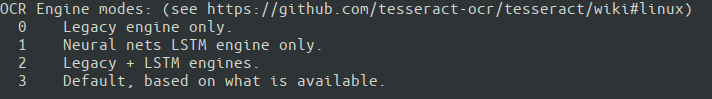

Attraverso il parametro __--psm__ è possibile selezionare il "page segmentation mode" cioè la modalità di suddivisione dell'immagine in linee e testo. Di seguito le possibili opzioni

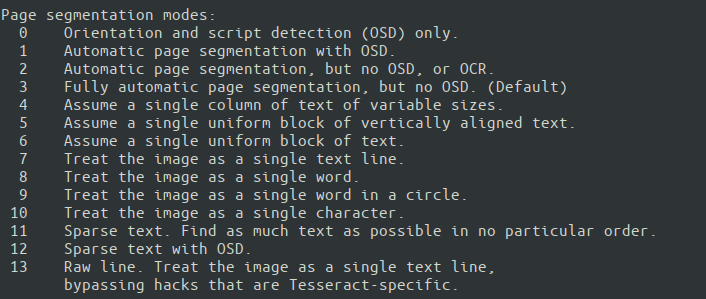